## Implementing rineal regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### Assigment 02/12/2021

Mejorar el algoritmo básico hecho en clase:

* Guardando todos los thetas y costes para poder luego plotear para cada iteración como evolucionan las cosas.
* Encapsular esto en una función.
* Crear un modulo .py para poder volver a utilizar esto en el futuro.
* Subir este modulo y un notebook demostrativo al repo (github).
* Explorar cosas que os interesen (ejemplo: avisar si converge o no, devolver diccionarios en lugar de listas...).
* Buscar datos en internet que sepamos que pueden ajustarse a una recta y comparar con nuestro algoritmo.
(Hint): para plotear usar IMPORT MATPLOTLIB.PYPLOT AS PLT: plt.plot, plt.scatter

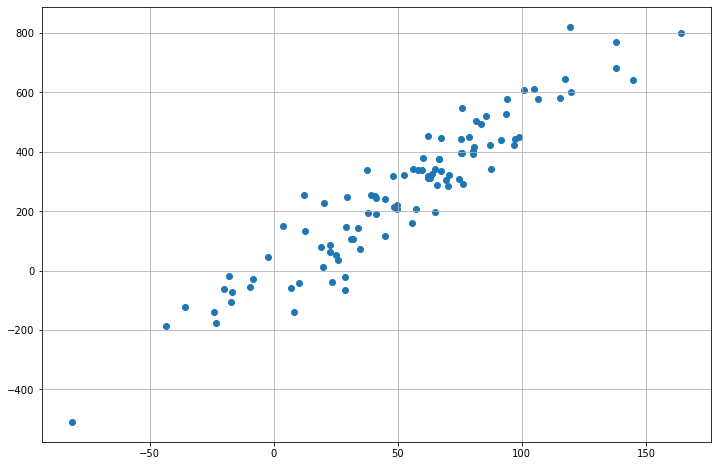

In [4]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta0 = 2
theta1 = 5


X = (np.random.randn(100) + 1) * 50
jitter = 75 * np.random.randn(100)
y = theta0 + theta1 * X + jitter

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.grid(True)

## 1) Gradient Descent

### 1.1) Defining Cost Function

In [5]:
def cost_funtion_lambdas (X, y):
    return lambda thetas: sum ((thetas[0] + thetas[1] *X - y)**2)/len(X)

### 1.2) Defining Derivates Functions

In [6]:
def derivative_theta0 (X, y):
    return lambda theta0, theta1: 2*sum(theta0 + theta1 * X - y) / len(X)

def derivative_theta1 (X, y):
    return lambda theta0, theta1: 2*sum((theta0 + theta1 * X - y) * X) / len(X)

### 1.3) Defining Gradient Desceny Function

In [7]:
def gradient_descent (theta0, theta1):
    f_dic = {}
    f_dic['theta0'] = theta0 - alpha*J_prime_0(theta0, theta1)
    f_dic['theta1'] = theta1 - alpha*J_prime_1(theta0, theta1)
    f_dic['cost'] = J([theta0,theta1])
    return (f_dic)

In [9]:
# Setting working variables:
nmax = 10
alpha = 0.0001
eps = 0.1
cost_before = 0

# Initializing empty lists
theta0_list = []
theta1_list = []
cost_list = []

theta0, theta1 = [-10,20]
J = cost_funtion_lambdas (X,y)
J_prime_0 = derivative_theta0(X,y)
J_prime_1 = derivative_theta1(X,y)

for i in range (0,nmax):
    gradient_descent_dic = gradient_descent (theta0, theta1)
    theta0 = gradient_descent_dic['theta0']
    theta1 = gradient_descent_dic['theta1']
    cost = gradient_descent_dic['cost']
    theta0_list.append(gradient_descent_dic['theta0'])
    theta1_list.append(gradient_descent_dic['theta1'])
    cost_list.append(gradient_descent_dic['cost'])
    
    convergense = np.abs(cost - cost_before) < eps
    cost_before = cost
    
    if convergense == True:
        print ("Convergence FOUND!")
        print ("Iteration Number: {} | theta0: {} | theta1: {} | Cost: {}".format(i, theta0_list[i], theta1_list[i], cost_list[i]))
        break



Convergence FOUND!
Iteration Number: 5 | theta0: -10.167859287117603 | theta1: 5.275368306560027 | Cost: 6265.659126764001
